# Исследование заведений общественного питания Москвы для Shut Up and Take My Money

- Автор: Алексей Кознов
- Дата: 12.03.25

### Цели и задачи проекта

Провести исследовательский анализ датасета с заведениями общественного питания Москвы, чтобы помочь инвесторам из фонда Shut Up and Take My Money выбрать подходящее место для заведения общественного питания, определиться с типом заведения и ценовой политикой.

Задачи:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа поступили два датасета с заведениями общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

 - `rest_info.csv` содержит информацию о заведениях общественного питания.
 - `rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания.
 
#### Описание датасета `rest_info.csv`
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - `0` — заведение не является сетевым;
    - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

#### Описание датасета `rest_price.csv`
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

   - «Средний счёт: 1000–1500 ₽»;
   - «Цена чашки капучино: 130–220 ₽»;
   - «Цена бокала пива: 400–600 ₽».
    и так далее;
    
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:

   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.

- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:

   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации

---

## 1. Загрузка данных и знакомство с ними 

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 686 kB 2.1 MB/s eta 0:00:01


In [2]:
# Выгружаем данные в переменные rest_df и price_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим последние строки датафрейма на экран
rest_df.tail()

,id,name,category,address,district,hours,rating,chain,seats
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12.0


In [5]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

Изучим данные и их корректность: 
- Названия столбцов написаны корректно
- **Строковые данные (object)** 6 столбцов имеют тип данных object: `id`, `name`, `category`, `address`, `district`, `hours`, по первому анализу первых пяти и последних строк датафрейма тип object подходит.
- **Числовые значения с плавающей запятой (float64)** 2 столбца имеют тип float64: `rating`, `seats`. Для `rating` тип float64 подходит, стоит попробовать уменьшить разрядность. А столбец `seats` стоит проверить, посмотреть уникальные значения, скорее всего следует поменять на тип int.
- **Целочисленный тип данных (int64)** 1 столбец `chain`. Следует уменьшить разрядность, т.к. столбец содержит значения 1 или 0. 
- Пропуски содержатся в столбцах `hours` и `seats`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [6]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим последние строки датафрейма на экран
price_df.tail()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
4053,962800540173458486f3c465437c2d8b,средние,Цена бокала пива:от 140 ₽,NaN,NaN
4054,4277890d659341848d7051cbf2e51f51,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
4055,026cbc478f9b4c3294a83458dcd89982,средние,NaN,NaN,NaN
4056,71cc394927204d45b81c3a91edb47955,NaN,Средний счёт:50–250 ₽,150.0,NaN
4057,62e8c64d4c89467aba608e39ef87616b,NaN,Средний счёт:от 150 ₽,150.0,NaN


In [8]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

Изучим данные и их корректность: 
- Названия столбцов написаны корректно
- **Строковые данные (object)** 3 столбца имеют тип данных object: `id`, `price`, `avg_bill`, по первому анализу первых пяти и последних строк датафрейма тип object подходит.
- **Числовые значения с плавающей запятой (float64)** 2 столбца имеют тип float64: `middle_avg_bill`, `middle_coffee_cup`. Данный тип не подходит для этих столбцов, его следует заменить на int, но размерность этих данных возможно следует оптимизировать.
- Пропуски содержатся во всех столбцах кроме `id`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
---

### Подготовка единого датафрейма

Задача проекта предполагает анализ различной информации о заведениях питания Москвы. Эти данные разбиты на два датафрейма, в одном информация о заведениях, во втором средний чек этих заведений. Поэтому такие данные удобно соединить в один датафрейм, который можно использовать для поиска закономерностей в данных. Соединять данные будем по идентификатору заведения. При соединении используем метод `left` и оставим все данные из первого датафрейма и только те данные из второго датафрейма, которые соответствуют ключевым значениям в первом датафрейме. Если совпадений нет, значения из второго датафрейма будут заполнены как `NaN`. Использовать `left`, а не `inner` будем, т.к. во втором случае пропадет часть данных в первом даатфрейме о адресе, районе, категории, рейтинге и пр., а они выглядят интереснее для анализа, чем данные из правого датафрема о среднем чеке без названия и адреса.

In [9]:
# Соединяем данные в единый датафрейм df
df = rest_df.merge(price_df, how='left', on='id')

In [10]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех заведениях из первого датафрейма сохранилась.

---

## 2. Предобработка данных


На этапе знакомства с данными было установлено, что три столбца представленны не корректно. Столбец `seats`, `middle_avg_bill` и `middle_coffee_cup` представлены в формате `float64`, скорее всего это произошло из-за того, что в данных присутствуют пропущенные значения и pandas привел все данные к типу float.

In [11]:
# Устанавливаем подавление научного формата
np.set_printoptions(suppress=True)
    
# Выведем уникальные значения в столбцах seats, middle_avg_bill, middle_coffee_cup
for column in ['seats', 'middle_avg_bill', 'middle_coffee_cup']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце seats:
[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   24.   25.
   26.   27.   28.   29.   30.   32.   33.   34.   35.   36.   37.   38.
   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.
   51.   52.   53.   54.   55.   56.   58.   60.   61.   62.   63.   64.
   65.   66.   67.   68.   69.   70.   72.   74.   75.   76.   77.   78.
   79.   80.   81.   82.   83.   84.   85.   86.   87.   88.   90.   92.
   93.   94.   95.   96.   97.   98.   99.  100.  102.  104.  105.  106.
  107.  108.  110.  112.  113.  114.  115.  116.  118.  120.  122.  124.
  125.  126.  127.  128.  130.  131.  132.  133.  135.  138.  140.  141.
  143.  144.  145.  146.  147.  148.  150.  151.  154.  155.  157.  158.
  159.  160.  161.  164.  165.  166.  167.  168.  170.  173.  174.  175.
  176.  178.  180.  184.  185.  187.  188.  189.  190.  192.  195.  198.
  200.  202.  

Судя по выведенной информации тип данных `float64` можно преобразовать в `int`, применим метод astype('Int64'), он преобразует тип данных из float в int не смотря на наличие пропусков.

In [12]:
# Преобразуем тип данных в столбцах seats, middle_avg_bill, middle_coffee_cup
for column in ['seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = df[column].astype('Int64')

In [13]:
# Уменьшим разрядность в столбцах rating, chain
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

df['rating'] = pd.to_numeric(df['rating'], downcast='float')

# Выведем типы данных
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                  Int64
price                 object
avg_bill              object
middle_avg_bill        Int64
middle_coffee_cup      Int64
dtype: object

При первичном анализе мы обнаружили пропуски в столбцах `hours`, `seats`, `price`,  `middle_avg_bill`, `middle_coffee_cup` и `avg_bill`. Узнаем абсолютное и относительное количество пропусков в этом столбце.

In [14]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
# Подсчитываем долю строк с пропусками
round(df.isna().mean(), 2)

id                   0.00
name                 0.00
category             0.00
address              0.00
district             0.00
hours                0.06
rating               0.00
chain                0.00
seats                0.43
price                0.61
avg_bill             0.55
middle_avg_bill      0.63
middle_coffee_cup    0.94
dtype: float64

В данных наблюдаются пропуски в следующих столбцах:
- `hours` - в столбце с графиком работы 536 пропусков, это 6 процентов от всех данных о времени работы. Некоторые заведения могли не указывать график работы в источниках данных, некоторые могут работать круглосуточно. Следует оставить эти данные как есть без изменений. 
- `seats` - в столбце с количеством посадочных мест 3611 пропусков, это почти 43 процента отсутствующих данных. Некоторые заведения могут не указывать количество посадочных мест. Следует оставить эти данные как есть без изменений. 
- `price` - в столбце с категорией цен 5091 пропуск, это почти 61 процент от всех данных категории цен. Некоторые заведения могут не указывать категорию цен, также т.к. данные могли заполнять пользователи, то они также могли не указывать эти данные. Следует оставить эти данные как есть без изменений.
- `avg_bill` - в столбце с средней стоимостью заказа 4590 пропусков, это почти 55 процентов отсутствующих данных. По аналогии с столюцом выше, некоторые заведения могут не указывать средний счет, также т.к. данные могли заполнять пользователи, то они также могли не указывать эти данные. Следует оставить эти данные как есть без изменений.
- `middle_avg_bill` - в данном столбце 5257 пропусков, это почти 63 процента. Данный столбец связан с столбцом `avg_bill`, он берет данные из этого столбца, этим объясняется большая часть пропусков. Следует заменить на значение индикатр -1.
- `middle_coffee_cup` - в данном столбце 7871 пропусков, это почти 94 процента. Данный столбец как и предыдущий связан с столбцом `avg_bill`, этим объясняется часть пропусков. Остальные пропуски скорее всего вызваны отсутствием данных в источнике. Следует заменить на значение индикатр -1.

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [16]:
#Проведем нормализацию столбцов с названием заведения
df['name'] = df['name'].str.strip().str.lower()

In [17]:
# Проверяем полные дубликаты в датафрейме bank_df
df.duplicated().sum()

0

В датафреймах нет полных дубликатов строк. Проверим неявные дубликаты — значения по `id` заведений должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [18]:
# Проверяем неявные дубликаты в датафрейме по столбцу id
df.duplicated(subset='id').sum()

0

In [19]:
# Проверяем неявные дубликаты в датафрейме по столбцам name и address
df.duplicated(subset=['name', 'address']).sum()

3

In [20]:
# Найдем дублирующиеся строки по столбцам 'name' и 'address'
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)]

# Выводим строки с дубликатами
display(duplicates)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,NaN,NaN,<NA>,<NA>
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,<NA>,<NA>
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,NaN,NaN,<NA>,<NA>
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,<NA>,<NA>
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,NaN,NaN,<NA>,<NA>
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276,NaN,NaN,<NA>,<NA>


Оставим только те данные, где больше информации о графике работы

In [21]:
# Создаем столбец с длинной столбца hours
df['len_hours'] = df['hours'].str.len()

# Сортируем данные в порядке убывания
df = df.sort_values(by='len_hours', ascending=False)

# Удаляем дубликаты, оставляя строку с наибольшей длинной 
df = df.drop_duplicates(subset=['name', 'address'], keep='first')

# Проверяем результат
display(df[(df['name'] == 'more poke') & (df['address'] == 'Москва, Волоколамское шоссе, 11, стр. 2')])
display(df[(df['name'] == 'раковарня клешни и хвосты') & (df['address'] == 'Москва, проспект Мира, 118')])
display(df[(df['name'] == 'хлеб да выпечка') & (df['address'] == 'Москва, Ярцевская улица, 19')])

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,len_hours
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,<NA>,<NA>,52.0


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,len_hours
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,<NA>,<NA>,52.0


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,len_hours
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,NaN,NaN,<NA>,<NA>,22.0


Теперь проверим корректность написания категориальных значений в данных.

In [22]:
# Проверяем уникальные значения в столбцах
for column in ['district', 'category', 'chain', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



В этих данных нет ошибок.

---

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [23]:
# Создаем столбец is_24_7
df['is_24_7'] = df['hours'].str.contains('ежедневно, круглосуточно', case=False, na=False)

#Выведем датафрейм с новым столбцом
display(df.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,len_hours,is_24_7
7864,94b5ce1ab314431d93fa678a2cb8cb8d,орхан,кафе,"Москва, Елецкая улица, 35, корп. 2А",Южный административный округ,пн 10:30–04:00; вт 11:00–03:00; ср 10:30–03:00...,4.3,1,90,NaN,NaN,<NA>,<NA>,97.0,False
699,eceb95b99f4c4aaeb97ff427e7f08c46,маргилан,столовая,"Москва, улица Декабристов, 15А",Северо-Восточный административный округ,"пн 00:01–12:00, перерыв 12:00–13:30; вт-чт 13:...",4.5,0,230,средние,Средний счёт:350–400 ₽,375,<NA>,91.0,False
3531,2d9b31f65cde4ad0bf88953de5664f61,dr. живаго,ресторан,"Москва, Моховая улица, 15/1с1",Центральный административный округ,"пн-чт круглосуточно; пт 00:00–05:00, перерыв 0...",4.8,0,<NA>,высокие,Средний счёт:2500–3000 ₽,2750,<NA>,88.0,False
1942,f39e8a31f99b4081b770b666e47efd84,g&m,"бар,паб","Москва, Новослободская улица, 16А",Центральный административный округ,пн круглосуточно; вт-чт 12:00–00:00; пт 12:00–...,4.3,0,<NA>,выше среднего,Средний счёт:1500 ₽,1500,<NA>,83.0,False
3732,9f6fd458f00a4e0fb6fdab33b512028d,шоколадница,кофейня,"Москва, Большая Садовая улица, 10",Центральный административный округ,"пн,вт 08:00–22:00; ср,чт 08:00–23:00; пт,сб кр...",4.3,1,68,NaN,NaN,<NA>,<NA>,73.0,False


---

### Промежуточный вывод


---

Для дальнейшего анализа мы провели работу по предобработке данных:
- проверили названия столбцов датафрейма
- проверили тип данных столбцов и привели их к нужному типу. 
  - Столбцы `seats`, `middle_avg_bill` и `middle_coffee_cup` из типа `float64` к типу `int16`
  - Cтолбцы `rating` и `chain` оптимизировали тип данных
- изучены пропуски в данных. Пропуски обнаружились в столбцах `hours`, `seats`, `price`,  `middle_avg_bill`, `middle_coffee_cup` и `avg_bill`. Т.к. данные получены из открытых источников, а также заполнены посетителями заведений, то пропуски скорее всего не являются ошибками в данных. Поэтому их оставили как есть.
- проверили данные на наличие явных и неявных дубликатов и удалили их 

## 3. Исследовательский анализ данных

---

### Задача 1

Исследуем количество объектов общественного питания по каждой категории. 

In [24]:
# Посчитаем количество заведений по каждой категории
df['category'].value_counts()

кафе               2377
ресторан           2041
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Визуализируем распределение в столбце `category` с помощью линейчатой диаграммы:

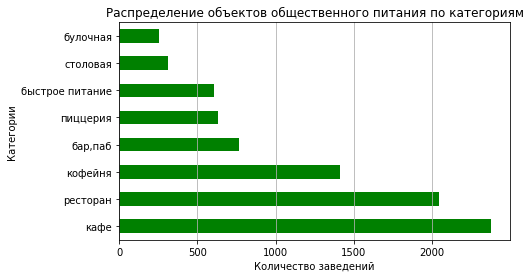

In [25]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 4))

# Строим столбчатую диаграмму 
df['category'].value_counts().plot(
               kind='barh',
               rot=0,
               legend=False,
               title='Распределение объектов общественного питания по категориям',
               color='g'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Категории')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

Наибольшее количество заведений являются кафе и рестораном, наименьшее количество являются булочная и столовая. 

---

### Задача 2

Исследуем распределение количества заведений по административным округам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. 

In [26]:
# Посчитаем количество заведений по каждому округу Москвы
df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

Визуализируем распределение в столбце `district` с помощью линейчатой диаграммы:

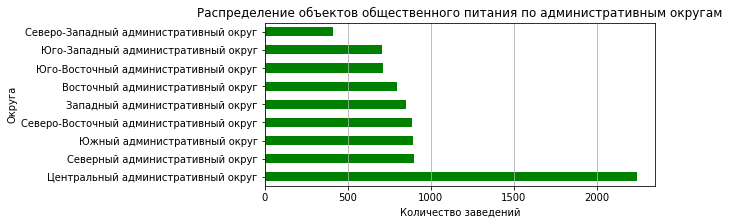

In [27]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='barh',
               rot=0,
               legend=False,
               title='Распределение объектов общественного питания по административным округам',
               color='g'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Округа')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

Наибольшее количество заведений находится в центре Москвы (2242), наименьшее в Северо-Западном округе (409). В остальных округах примерно одинаковое количество заведений и варьируется от 709 до 899.

Отдельно исследуем центр Москвы

In [28]:
# Создадим отфильтрованный даатфрейм по центральному округу
central_df = df[df['district'] == 'Центральный административный округ']

# Используем value_counts() для подсчёта количества заведений по категориям
central_df['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

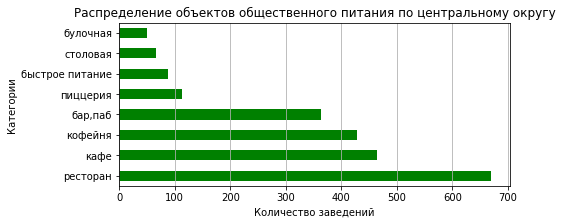

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму 
central_df['category'].value_counts().plot(
               kind='barh',
               rot=0,
               legend=False,
               title='Распределение объектов общественного питания по центральному округу',
               color='g'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Категории')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

В центре Москвы преобладают рестораны (670 шт.), далее идут кафе (464 шт.), кофейни (428 шт.) и бары (364 шт.), а булочных и столовых наименьшее количество, 66 и 50 соотвественно.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

In [30]:
# Посчитаем количество сетевых и не сетевых заведений, где 0 означает, 
# что заведение является не сетевым, а 1 является сетевым
df['chain'].value_counts()

0    5198
1    3205
Name: chain, dtype: int64

Визуализируем распределение в столбце `chain`

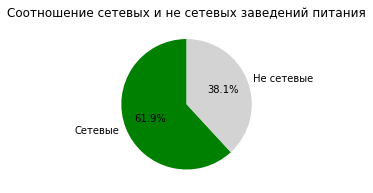

In [31]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим круговую диаграмму
df['chain'].value_counts().plot(
               kind='pie',  # Используем круговую диаграмму
               autopct='%1.1f%%',  # Добавляем проценты на диаграмму
               startangle=90,  # Начинаем с угла 90 градусов для лучшего визуального восприятия
               colors=['g', 'lightgray'],  # Задаём цвета для категорий
               title='Соотношение сетевых и не сетевых заведений питания',
               labels=['Сетевые', 'Не сетевые']
)

# Настраиваем оформление графика
plt.ylabel('')  # Убираем подпись оси Y, так как для круговой диаграммы она не нужна

# Выводим график
plt.show()

Судя по данным несетевых заведений больше чем сетевых, 5198 не сетевых против 3205 сетевых.

In [32]:
# Посчитаем количество сетевых и не сетевых заведений в разрезе категорий этих заведений
df.groupby('chain')['category'].value_counts().sort_values(ascending=False).unstack()

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
chain,,,,,,,,
0,596,99,371,1598,693,303,1311,227
1,169,157,232,779,720,330,730,88


In [33]:
# Фильтруем данные, оставляя только строки, где chain = 1
filtered_df = df[df['chain'] == 1]

# Группируем и считаем количество сетевых заведений по категориям
display(filtered_df['category'].value_counts())

кафе               779
ресторан           730
кофейня            720
пиццерия           330
быстрое питание    232
бар,паб            169
булочная           157
столовая            88
Name: category, dtype: int64

Посчитаем долю сетевых заведений в разрезе категорий этих заведений

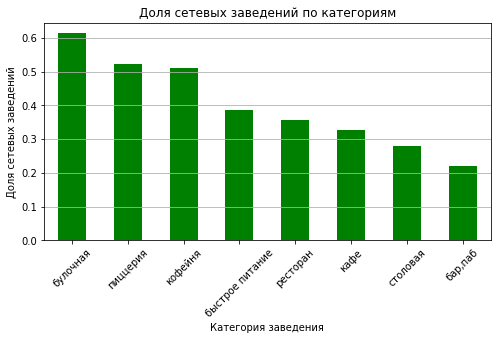

In [34]:
# Группируем данные по категориям и считаем долю сетевых заведений
chain_by_category = df.groupby('category')['chain'].mean().sort_values(ascending=False)

# Построим график столбчатой диаграммы
chain_by_category.plot(
               kind='bar',
               title='Доля сетевых заведений по категориям',
               legend=False,
               rot=45,
               figsize=(8, 4),
               color='g'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Доля сетевых заведений')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

Больше всего сетевых заведений по количеству это кафе, кофейни и рестораны, меньше всего это столовые и булочные, которых в целом меньше по количеству заведений в Москве, но доля сетевых заведений среди не сетевых в этих категориях выглядит иначе, больше всего доля сетевых заведений в булочной, кофейне и пиццерии, меньше всего среди баров.

---

### Задача 4

Исследуем количество посадочных мест в заведениях.

In [35]:
# Изучим статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

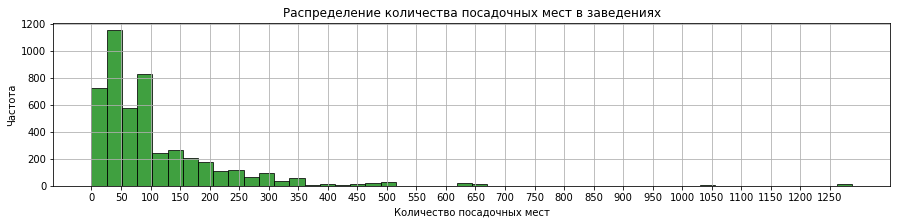

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 3))

# Строим гистограмму 
df['seats'].plot(
                kind='hist', 
                bins=50,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                color='g'
)

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()
# Добавляем деления кратные 50 на график
plt.xticks(range(0, 1288, 50))

# Выводим график
plt.show()

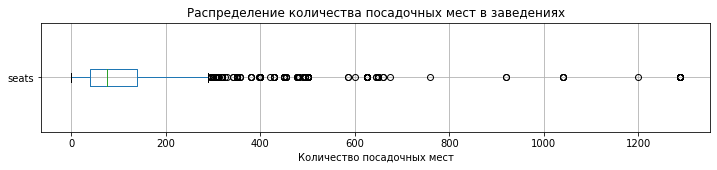

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 2))

# Строим диаграмму размаха значений в столбце seats
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

In [38]:
# Выведем данные по заведениям, у которых более 1000 посадочных мест
anomalies = df[df['seats'] > 1000]
display(anomalies[['name', 'seats', 'category']])

,name,seats,category
2770,шоколадница,1040,кофейня
6524,ян примус,1288,ресторан
6838,alternative coffee,1288,кофейня
6658,гудбар,1288,"бар,паб"
6574,мюнгер,1288,пиццерия
6807,loft-cafe академия,1288,кафе
6808,яндекс лавка,1288,ресторан
6518,delonixcafe,1288,ресторан
6641,one price coffee,1288,кофейня
2722,маргарита,1040,быстрое питание


Распределение количества посадочных мест асимметричное, скошенное вправо. Минимальный количество мест — 0, что не является ошибкой, это могут быть киоски с шавермой, блинами и кофе. Максимальное количество посадочных мест — аномально высокое 1288, что может являться ошибкой, могли быть данные с фудкорта, где расположено кафе, могли быть просто не корректные данные, но также это может быть и залы для мероприятий или большие рестораны и тогда это не будет являться ошибкой. Стандартное отклонение достаточно большое 122, что указывает на большой разброс в данных. Среднее значение соответствует 108 мест, тогда как медиана — 75, что также говорит о неравномерном распределении и аномалиях в данных. По гистограмме размаха видно, что значения выше примерно 300 мест можно считать выбросами, но мы оставим все значения поскольку если отбросить такие данные, то можно исключить из анализа целую категорию заведений.

Чтобы определить наиболее типичное количество посадочных мест для каждой категории, мы используем медиану (она менее чувствительна к выбросам, чем среднее значение)

In [39]:
# Группируем данные по категориям и считаем медиану
typical_seats = df.groupby('category')['seats'].median()
print(typical_seats)

category
бар,паб            82.5
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: Float64


---

### Задача 5

Исследуем рейтинг заведений.

In [40]:
# Выведем усредненный рейтинг по категориям заведений
df.groupby('category')['rating'].mean().sort_values(ascending=False)

category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290348
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float32

In [41]:
# Выведем статистические показатели столбца rating
df['rating'].describe()

count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

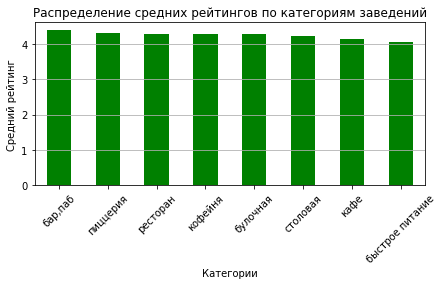

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму 
df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(
                        kind='bar',
                        rot=45,
                        legend=False,
                        title='Распределение средних рейтингов по категориям заведений',
                        color='g'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Средний рейтинг')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

Визуализация и анализ показывают, что средние рейтинги немного различаются между категориями, но в среднем у всех близки к четырем. Выше всего средний рейтинг у баров (4.39), меньше всего у заведений бытстрого питания (4.05)

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений.

In [43]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.198941
district,0.189389
is_24_7,0.160864
chain,0.119417
seats,0.000000


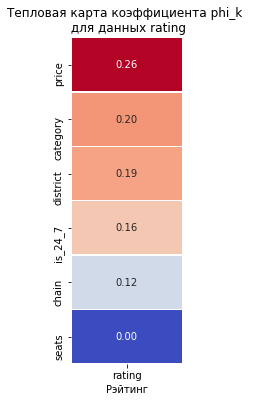

In [44]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками заведения
data_heatmap = correlation_matrix[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(
    data_heatmap,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar=False
)

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рэйтинг')

# Выводим график
plt.show()

Cравним значения в каждом сегменте со средним для всех данных — это поможет понять, где метрика уменьшается, а где увеличивается. 

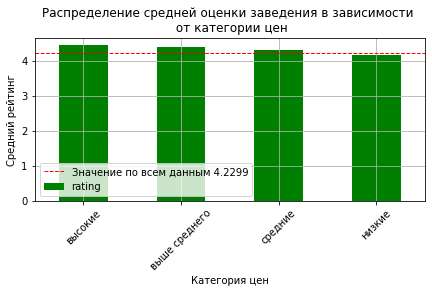

In [45]:
# Применим функцию и изучим распределение среднего рейтинга в зависимости от категории цен
grouped = df.groupby('price').agg({'rating':'mean'}).sort_values('rating', ascending=False)
grouped.plot(kind='bar',
                title='Распределение средней оценки заведения в зависимости \n от категории цен',
                legend=True,
                ylabel='Средний рейтинг',
                xlabel='Категория цен',
                rot=45,
                color='g',
                figsize=(7, 3))

# Рассчитываем общее значение усредненного рейтинга по всем данным
mean_churn_share = df.agg({'rating':'mean'}).iloc[0]

# Наносим на график линию с усредненным значением по всем данным
plt.axhline(mean_churn_share, color='red',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным {round(mean_churn_share,4)}')

plt.grid()
plt.legend()
plt.show()

Нет чёткой зависимости между увеличением или уменьшением среднего рейтинга и категорией цен. Значения находятся примерно около среднего, однако можно отметить, что заведения с высокими ценами и ценами выше среднего имеют рейтинг выше, чем остальные.

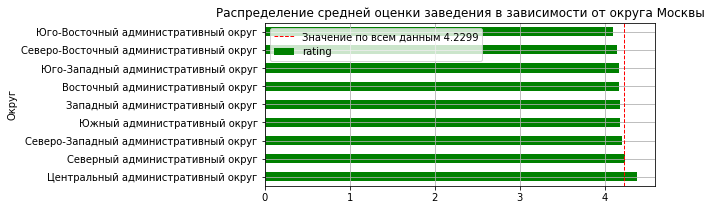

In [46]:
# Применим функцию и изучим распределение среднего рейтинга в зависимости от округа Москвы
grouped = df.groupby('district').agg({'rating':'mean'}).sort_values(by='rating', ascending=False)
grouped.plot(kind='barh',
                title='Распределение средней оценки заведения в зависимости от округа Москвы',
                legend=True,
                ylabel='Средний рейтинг',
                xlabel='Округ',
                rot=0,
                color='g',
                figsize=(7, 3))

# Рассчитываем общее значение усредненного рейтинга по всем данным
mean_churn_share = df.agg({'rating':'mean'}).iloc[0]

# Наносим на график линию с усредненным рейтингом по всем данным
plt.axvline(mean_churn_share, color='red',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным {round(mean_churn_share,4)}')

plt.grid()
plt.legend()
plt.show()

Как и с графиком выше нет чёткой зависимости между увеличением или уменьшением среднего рейтинга и районом Москвы. Значения находятся примерно около среднего, однако можно отметить, что в центральнмо районе в среднем рейтинг выше, а в Юго-Восточном немного ниже. 

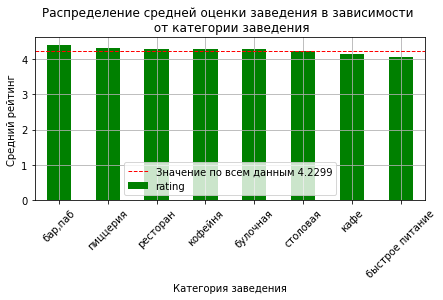

In [47]:
# Применим функцию и изучим распределение среднего рейтинга в зависимости от категории цен
grouped = df.groupby('category').agg({'rating':'mean'}).sort_values('rating', ascending=False)
grouped.plot(kind='bar',
                title='Распределение средней оценки заведения в зависимости \n от категории заведения',
                legend=True,
                ylabel='Средний рейтинг',
                xlabel='Категория заведения',
                rot=45,
                color='g',
                figsize=(7, 3))

# Рассчитываем общее значение value по всем данным
mean_churn_share = df.agg({'rating':'mean'}).iloc[0]

# Наносим на график линию с значением value по всем данным
plt.axhline(mean_churn_share, color='red',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным {round(mean_churn_share,4)}')

plt.grid()
plt.legend()
plt.show()

Нет чёткой зависимости между увеличением или уменьшением среднего рейтинга и категорией заведения. Значения находятся примерно около среднего, однако можно отметить, что в категории бар средний рейтинг выше, а в быстром питании и кафе немного ниже.

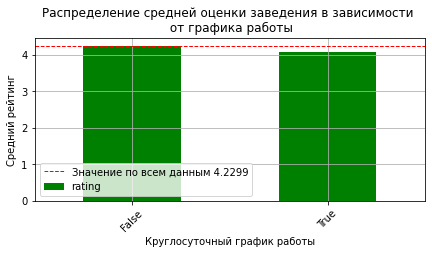

In [48]:
# Применим функцию и изучим распределение среднего рейтинга в зависимости от графика работы
grouped = df.groupby('is_24_7').agg({'rating':'mean'})
grouped.plot(kind='bar',
                title='Распределение средней оценки заведения в зависимости \n от графика работы',
                legend=True,
                ylabel='Средний рейтинг',
                xlabel='Круглосуточный график работы',
                rot=45,
                color='g',
                figsize=(7, 3))

# Рассчитываем общее значение value по всем данным
mean_churn_share = df.agg({'rating':'mean'}).iloc[0]

# Наносим на график линию с значением value по всем данным
plt.axhline(mean_churn_share, color='red',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным {round(mean_churn_share,4)}')

plt.grid()
plt.legend()
plt.show()

Работает ли заведение круглосуточно или нет практически не влияет средний рейтинг заведения.

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга.

In [49]:
# Фильтруем сетевые заведения
df_chain = df[df['chain'] == 1]

# Группируем по названиям сетей и считаем количество заведений
chain_counts = df_chain.groupby('name')['id'].count().reset_index(name='count')

# Выбираем топ 15 заведений по колчиеству
top15 = chain_counts.sort_values(by='count', ascending=False).head(15)

# Считаем средний рейтинг для каждой сети
chain_rating = df_chain.groupby('name')['rating'].mean().reset_index(name='mean_rating')

# Добавляем категорию для каждого заведения и оставляем только одну категорию на завеедение
chain_category = df_chain.drop_duplicates(subset=['name'])[['name', 'category']]

# Объединяем данные по количеству заведений и среднему рейтингу
top15 = top15.merge(chain_rating, on='name')
top15 = top15.merge(chain_category, on='name')

# Выводим топ 15 заведений
display(top15)

,name,count,mean_rating,category
0,шоколадница,120,4.177500,кофейня
1,домино'с пицца,76,4.169737,пиццерия
2,додо пицца,74,4.286487,пиццерия
3,one price coffee,71,4.064789,кофейня
4,яндекс лавка,69,3.872464,ресторан
5,cofix,65,4.075385,кофейня
6,prime,50,4.116000,ресторан
7,хинкальная,44,4.322727,ресторан
8,кофепорт,42,4.147619,кофейня
9,кулинарная лавка братьев караваевых,39,4.394872,кафе


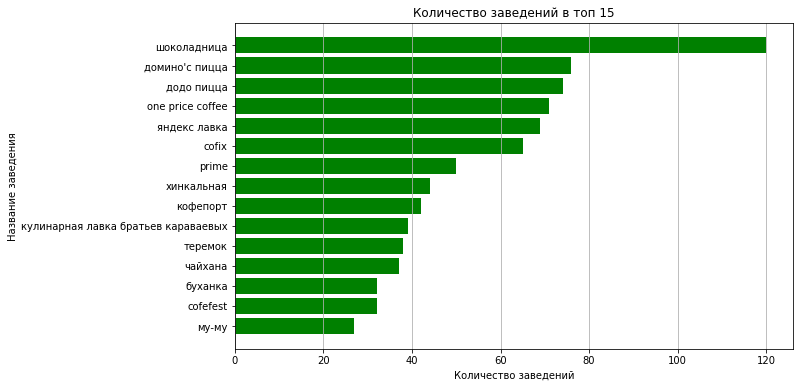

In [50]:
# Сортируем данные по рейтингу (по убыванию)
top15_sorted = top15.sort_values(by='count', ascending=True)

# Строим график с отсортированными данными
plt.figure(figsize=(10, 6))
plt.barh(top15_sorted['name'], top15_sorted['count'], color='g')

# Добавляем заголовок и подпись по оси Х и Y
plt.title('Количество заведений в топ 15')
plt.xlabel('Количество заведений')
plt.ylabel('Название заведения')

# Добавляем сетку на ось X
plt.grid(axis='x')

# Выводим график
plt.show()

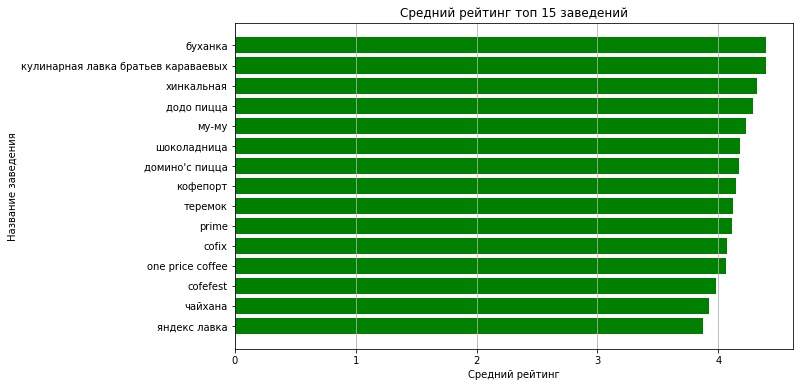

In [51]:
# Сортируем данные по рейтингу (по убыванию)
top15_sorted = top15.sort_values(by='mean_rating', ascending=True)

# Строим график с отсортированными данными
plt.figure(figsize=(10, 6))
plt.barh(top15_sorted['name'], top15_sorted['mean_rating'], color='g')

# Добавляем заголовок и подпись по оси Х и Y
plt.title('Средний рейтинг топ 15 заведений')
plt.xlabel('Средний рейтинг')
plt.ylabel('Название заведения')

# Добавляем сетку на ось X
plt.grid(axis='x')

# Выводим график
plt.show()

Самое популярное сетевое заведение в Москве — это Шоколадница, которая насчитывает 120 заведений. Второе и третье места занимают Домино'с пицца (76 заведений) и Додо пицца (74 заведения) соответственно, меньше всего заведений кафе "Му-Му" (27 шт.). Рейтинг 15 самых популярных заведений варьируется от 3.87 до 4.4, и в среднем составляет 4.1, разброс рейтинга небольшой, это все говорит о высоком качестве обслуживания и удовлетворенности клиентов. Самый высокий рейтинг у булочной "Буханка" (4.4) и кафе "Кулинарная лавка братьев Караваевых" (4.4), самый низкий среди топ 15 у Яндекс лавки (3.87). Среди топ-15 заведений преобладают кофейни, кафе и рестораны.

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от округа Москвы. Проанализируем цены в Центральном административном округе и других. 


In [52]:
# Группировка по округам и расчёт среднего чека
grouped_district = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)
display(grouped_district)

district
Центральный административный округ         1191.057547
Западный административный округ             1053.22549
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ       822.22293
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: Float64

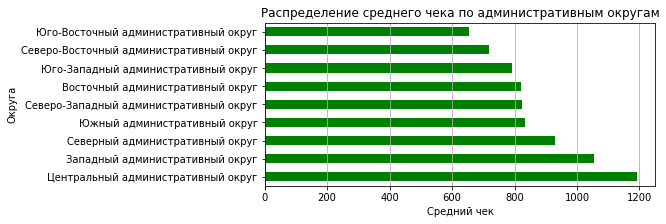

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим линейчатую диаграмму 
grouped_district = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)
grouped_district.plot(
               kind='barh',
               rot=0,
               legend=False,
               title='Распределение среднего чека по административным округам',
               color='g'
)

# Настраиваем оформление графика
plt.xlabel('Средний чек')
plt.ylabel('Округа')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

Сделаем график и сравним медианну среднего чека и усредненный средний чек по округам Москвы

<Figure size 720x432 with 0 Axes>

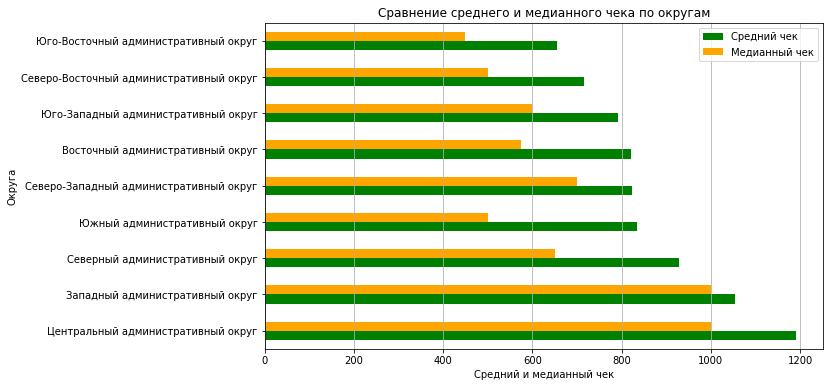

In [54]:
# Группируем данные по округам и считаем среднее и медиану
grouped_district = df.groupby('district')['middle_avg_bill'].agg(['mean', 'median']).sort_values('mean', ascending=False)

# Создаём контейнер графика и задаём размер
plt.figure(figsize=(10, 6))

# Строим группированный барплот
grouped_district.plot(
               kind='barh',
               rot=0,
               title='Сравнение среднего и медианного чека по округам',
               color=['g', 'orange'], 
               figsize=(10, 6)
)

# Настраиваем оформление графика
plt.xlabel('Средний и медианный чек')
plt.ylabel('Округа')
plt.legend(labels=['Средний чек', 'Медианный чек']) 

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

In [55]:
# Создаем столбец is_center
df['is_center'] = df['district'].str.contains('Центральный административный округ', case=False, na=False)

#Выведем датафрейм с новым столюцом
display(df.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,len_hours,is_24_7,is_center
7864,94b5ce1ab314431d93fa678a2cb8cb8d,орхан,кафе,"Москва, Елецкая улица, 35, корп. 2А",Южный административный округ,пн 10:30–04:00; вт 11:00–03:00; ср 10:30–03:00...,4.3,1,90,NaN,NaN,<NA>,<NA>,97.0,False,False
699,eceb95b99f4c4aaeb97ff427e7f08c46,маргилан,столовая,"Москва, улица Декабристов, 15А",Северо-Восточный административный округ,"пн 00:01–12:00, перерыв 12:00–13:30; вт-чт 13:...",4.5,0,230,средние,Средний счёт:350–400 ₽,375,<NA>,91.0,False,False
3531,2d9b31f65cde4ad0bf88953de5664f61,dr. живаго,ресторан,"Москва, Моховая улица, 15/1с1",Центральный административный округ,"пн-чт круглосуточно; пт 00:00–05:00, перерыв 0...",4.8,0,<NA>,высокие,Средний счёт:2500–3000 ₽,2750,<NA>,88.0,False,True
1942,f39e8a31f99b4081b770b666e47efd84,g&m,"бар,паб","Москва, Новослободская улица, 16А",Центральный административный округ,пн круглосуточно; вт-чт 12:00–00:00; пт 12:00–...,4.3,0,<NA>,выше среднего,Средний счёт:1500 ₽,1500,<NA>,83.0,False,True
3732,9f6fd458f00a4e0fb6fdab33b512028d,шоколадница,кофейня,"Москва, Большая Садовая улица, 10",Центральный административный округ,"пн,вт 08:00–22:00; ср,чт 08:00–23:00; пт,сб кр...",4.3,1,68,NaN,NaN,<NA>,<NA>,73.0,False,True


Построим столбчатую диаграмму для визуализцаии

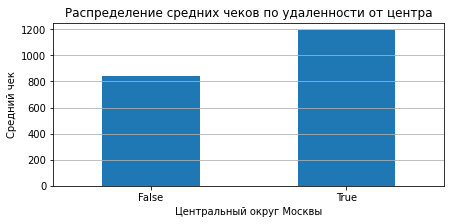

In [56]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму 
df.groupby('is_center')['middle_avg_bill'].mean().plot(
                        kind='bar',
                        rot=0,
                        legend=False,
                        title='Распределение средних чеков по удаленности от центра'
)

# Настраиваем оформление графика
plt.xlabel('Центральный округ Москвы')
plt.ylabel('Средний чек')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

In [57]:
# Группировка по значению центральный округ или нет и расчёт среднего чека
df.groupby('is_center')['middle_avg_bill'].mean()

is_center
False     839.822882
True     1191.057547
Name: middle_avg_bill, dtype: Float64

Самый высокий средний чек наблюдается в Центральном административном округе (1191 руб.), что объясняется его престижным расположением и высокой концентрацией премиальных заведений. Второе и третье места занимают Западный административный округ (1053 руб.) и Северный административный округ (928 руб.). В остальных районах средний чек варьируется от 654 руб. до 834 руб. Часть Западного административного округа находится практически в центре, чем возможно объясняется занятое им второе место. Средний чек по округам составляет 840 руб., а средний чек в центре составляет 1191 руб., что указывает на достаточно большое различия в ценах между центральным и остальными округами. Есть различия между медианным чеком и средним по всем округам кроме Западного, что указывает на наличие заведений с высокими ценами. В Западном равномерное распределение цен. 


Попробуем сравнить средний чек и плотность населения округов. Возьмем данные о численности населения Москвы с сайта https://mbfinance.ru/investitsii/prognozy-i-analitika/naselenie-moskva/ за 2022 год (т.к. наши данные в датасете представленны тоже за 2022 год), а площади с википедии. 

In [58]:
# Создадим словарь с численность населения  округов Москвы
population_data = {
    'Центральный административный округ': 779086,
    'Западный административный округ': 1383853,
    'Северный административный округ': 1175229,
    'Южный административный округ': 1773425,
    'Северо-Западный административный округ': 1009217,
    'Восточный административный округ': 1514420,
    'Юго-Западный административный округ': 1442971,
    'Северо-Восточный административный округ': 1427597,
    'Юго-Восточный административный округ': 1432839
}

# Создадим словарь с площадями округов (в км²)
area_data = {
    'Центральный административный округ': 66.18,
    'Западный административный округ': 153.03,
    'Северный административный округ': 113.73,
    'Южный административный округ': 131.77,
    'Северо-Западный административный округ': 93.28,
    'Восточный административный округ': 154.84,
    'Юго-Западный административный округ': 111.36,
    'Северо-Восточный административный округ': 101.88,
    'Юго-Восточный административный округ': 117.56
}

# Добавим столбцы с этими данными к нашему датафрейму
df['area_data'] = df['district'].map(area_data)
df['population_data'] = df['district'].map(population_data)

# Создадим столбец с плотностью населения на тысячу человек
df['density'] = round((df['population_data'] / df['area_data'])/1000, 2)

# Выведем результат
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,len_hours,is_24_7,is_center,area_data,population_data,density
7864,94b5ce1ab314431d93fa678a2cb8cb8d,орхан,кафе,"Москва, Елецкая улица, 35, корп. 2А",Южный административный округ,пн 10:30–04:00; вт 11:00–03:00; ср 10:30–03:00...,4.3,1,90,NaN,NaN,<NA>,<NA>,97.0,False,False,131.77,1773425,13.46
699,eceb95b99f4c4aaeb97ff427e7f08c46,маргилан,столовая,"Москва, улица Декабристов, 15А",Северо-Восточный административный округ,"пн 00:01–12:00, перерыв 12:00–13:30; вт-чт 13:...",4.5,0,230,средние,Средний счёт:350–400 ₽,375,<NA>,91.0,False,False,101.88,1427597,14.01
3531,2d9b31f65cde4ad0bf88953de5664f61,dr. живаго,ресторан,"Москва, Моховая улица, 15/1с1",Центральный административный округ,"пн-чт круглосуточно; пт 00:00–05:00, перерыв 0...",4.8,0,<NA>,высокие,Средний счёт:2500–3000 ₽,2750,<NA>,88.0,False,True,66.18,779086,11.77
1942,f39e8a31f99b4081b770b666e47efd84,g&m,"бар,паб","Москва, Новослободская улица, 16А",Центральный административный округ,пн круглосуточно; вт-чт 12:00–00:00; пт 12:00–...,4.3,0,<NA>,выше среднего,Средний счёт:1500 ₽,1500,<NA>,83.0,False,True,66.18,779086,11.77
3732,9f6fd458f00a4e0fb6fdab33b512028d,шоколадница,кофейня,"Москва, Большая Садовая улица, 10",Центральный административный округ,"пн,вт 08:00–22:00; ср,чт 08:00–23:00; пт,сб кр...",4.3,1,68,NaN,NaN,<NA>,<NA>,73.0,False,True,66.18,779086,11.77


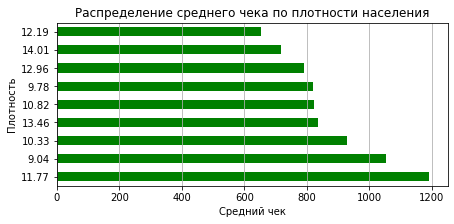

In [59]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим линейчатую диаграмму 
grouped_district = df.groupby('density')['middle_avg_bill'].mean().sort_values(ascending=False)
grouped_district.plot(
               kind='barh',
               rot=0,
               legend=False,
               title='Распределение среднего чека по плотности населения',
               color='g'
)

# Настраиваем оформление графика
plt.xlabel('Средний чек')
plt.ylabel('Плотность')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

Проведенный анализ выявил отсутствие выраженной связи между плотностью населения и величиной среднего чека. В районах с высокой плотностью бывают как низкие средние чеки, так и высокие, это же касается раонов с низкой плотностью. 

---

### Промежуточный вывод


Анализ данных показал, что:
- Кафе и рестораны доминируют на рынке, что может указывать на высокий спрос на эти форматы.
- Центр Москвы является наиболее привлекательным для открытия заведений, но также и наиболее конкурентным.
- В центре преобладают рестораны, кафе, кофейни и бары
- Несетевые заведения более распространены, но сетевые форматы (кафе, кофейни, рестораны) имеют сильные позиции, например узнаваемый бренд, единые стандарты качества, выгодные условия закупок и др.
- Большинство заведений имеют от 50 до 100 посадочных мест.
- Рейтинг заведения показывает незначительные различия в зависимости от категории заведения.
- Рейтинги заведений достаточно высокие, что говорит о высокой удовлетворённости клиентов.
- Рейтинг слабо зависит от категории, района или ценовой политики, но заведения с высокими ценами и в центре имеют небольшое преимущество.
- В сетевых заведениях по количеству преобладают кофейни, кафе и рестораны, а средний рейтинг около 4. Но доля сетевых заведений среди не сетевых в этих категориях выглядит иначе, больше всего доля сетевых заведений в булочной, кофейне и пиццерии, меньше всего среди баров.
- Цены в заведениях выше в центре.
- Плотность населения не оказывает сильного влияния на средний чек.

## 4. Итоговый вывод и рекомендации

### Подведём итоги

Были загружены данные  двух датасетов: `rest_info.csv` и  `rest_price.csv`, в первом содержалась информация о заведениях общественного питания, во втором о среднем чеке в заведениях. В дальнейшем датасеты были объединены в единый датафрейм, в который вошли данные о 8403 заведениях питания Москвы.

Для дальнейшего анализа мы провели работу по предобработке данных:
- проверили названия столбцов датафрейма
- проверили тип данных столбцов и привели их к нужному типу. 
  - Столбцы `seats`, `middle_avg_bill` и `middle_coffee_cup` из типа `float64` к типу `int16`
  - Cтолбцы `rating` и `chain` оптимизировали тип данных
- изучены пропуски в данных. Пропуски обнаружились в столбцах `hours`, `seats`, `price`,  `middle_avg_bill`, `middle_coffee_cup` и `avg_bill`. Т.к. данные получены из открытых источников, а также заполнены посетителями заведений, то пропуски скорее всего не являются ошибками в данных. Поэтому их оставили как есть.
- проверили данные на наличие явных и неявных дубликатов и удалили их 
- создан столбец `is_24_7` для отображения вида графика работы (круглосуточно или нет)

Провели исследовательский анализ данных:
- Исследовали количество объектов общественного питания по каждой категории.
- Исследовали распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.
- Изучили соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.
- Исследовали рейтинг заведений.
- Изучили, с какими данными показывают самую сильную корреляцию рейтинги заведений.
- Сгруппировали данные по названиям заведений и нашли топ-15 популярных сетей в Москве. Для них посчитали значения среднего рейтинга.
- Изучили вариацию среднего чека заведения в зависимости от района Москвы. Проанализировали цены в Центральном административном округе и других.
- Сделали визуализации по каждому пункту исследовательского анализа.


#### Итоговые выводы и рекомендации:

- Тип заведения: Кафе или ресторан, так как эти форматы наиболее популярны.
- Локация: Центральный административный округ или Западный округ (высокий средний чек и спрос).
- Ценовая политика: ориентироваться на средний чек в выбранном районе (например, 1000–1200 руб. в центре).
- Сетевой формат: Рассмотреть возможность открытия сетевого заведения, так как они демонстрируют стабильно высокие рейтинги и популярность.
- Количество мест: Оптимально — 50–100 посадочных мест